In [1]:
import pandas as pd
import numpy
import matplotlib as plt
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt	
import seaborn as sns
import folium
import re

# 명사추출
from konlpy.tag import Twitter
from konlpy.tag import Kkma

# 워드클라우드
from wordcloud import WordCloud

In [2]:
df =pd.read_csv('./부산여행추천_유튜브.csv',encoding='utf-8')

In [3]:
df['title'].str[0:]

0      부산여행 완전정복 !  권역별로 꼭 가봐야하는 부산여행지 23곳 추천, 야경명소, ...
1      22년~23년 부산여행을 가장 잘하는 방법! 이 영상 하나만 보면 해결됩니다! 꼭 ...
2      부산여행 필수코스 18곳 | 부산시민은 알고 관광객만 모르는💡야경 스팟 & 부산 갈...
3                      부산 주요핫플 총정리💥 Busan Travel Ι 부산여행👍
4      부산 2박3일 여행  계획없이 가도 그대로 따라하면 성공하는 부산 여행 코스! 효율...
                             ...                        
764    부산 여행 필수코스 ✈️ | 부산 요트투어 🐬 |  요트 6시, 요트 7시 비교영상...
765    #경상도 #여행지추천 | 장사상륙작전 전승기념관 | #2022보훈사적지탐방 #202...
766    부산 대게 킹크랩은 여기가 1등🥇| 부산 기장 핫한 대게 맛집 | 부모님 모시기 좋...
767          부산에서 꼭 먹어봐야할 김밥 1위 짭쪼롬한 유부김밥이 진짜 미쳤음; #백설대학
768    서울ㅣ워커힐ㅣ1박2일ㅣ호캉스ㅣ가족여행🇰🇷ㅣ더뷔페ㅣ수영장🏊ㅣ생일파티🥳🎉ㅣ브이로그 | ...
Name: title, Length: 769, dtype: object

In [4]:
df['title']= df['title'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df['title']=df["title"].map(lambda x : (re.sub(' +', ' ', x)))

In [5]:
df

,title
0,부산여행 완전정복 권역별로 꼭 가봐야하는 부산여행지 23곳 추천 야경명소 부산카페 ...
1,22년 23년 부산여행을 가장 잘하는 방법 이 영상 하나만 보면 해결됩니다 꼭 봐야...
2,부산여행 필수코스 18곳 부산시민은 알고 관광객만 모르는 야경 스팟 부산 갈 때 마...
3,부산 주요핫플 총정리 Busan Travel Ι 부산여행
4,부산 2박3일 여행 계획없이 가도 그대로 따라하면 성공하는 부산 여행 코스 효율적인...
...,...
764,부산 여행 필수코스 부산 요트투어 요트 6시 요트 7시 비교영상 요트투어 부산여행 ...
765,경상도 여행지추천 장사상륙작전 전승기념관 2022보훈사적지탐방 2022보훈릴레이 ...
766,부산 대게 킹크랩은 여기가 1등 부산 기장 핫한 대게 맛집 부모님 모시기 좋은 식당...
767,부산에서 꼭 먹어봐야할 김밥 1위 짭쪼롬한 유부김밥이 진짜 미쳤음 백설대학


In [6]:
df['title'].to_csv('./부산여행추천_split.csv',encoding='utf-8',index=False)

In [7]:
df['title'].str.split(' ',expand=True)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,부산여행,완전정복,권역별로,꼭,가봐야하는,부산여행지,23곳,추천,야경명소,부산카페,...,Travel,None,None,None,None,None,None,None,None,None
1,22년,23년,부산여행을,가장,잘하는,방법,이,영상,하나만,보면,...,부산,신상여행지,부터,야경,일몰명소,핫플레이스,까지,None,None,None
2,부산여행,필수코스,18곳,부산시민은,알고,관광객만,모르는,야경,스팟,부산,...,곳들,카카오맵,여행지도,공유,,None,None,None,None,None
3,부산,주요핫플,총정리,Busan,Travel,Ι,부산여행,,None,None,...,None,None,None,None,None,None,None,None,None,None
4,부산,2박3일,여행,계획없이,가도,그대로,따라하면,성공하는,부산,여행,...,국제시장,부평깡통시장,감천마을,광안리,해운대,등,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,부산,여행,필수코스,부산,요트투어,요트,6시,요트,7시,비교영상,...,None,None,None,None,None,None,None,None,None,None
765,,경상도,여행지추천,장사상륙작전,전승기념관,2022보훈사적지탐방,2022보훈릴레이,rememberourcentury,우리의한세기,역사탐방,...,None,None,None,None,None,None,None,None,None,None
766,부산,대게,킹크랩은,여기가,1등,부산,기장,핫한,대게,맛집,...,즐기면서,먹는,대게,맛집,분위기,좋은,대게,맛집,품격있는,모임장소
767,부산에서,꼭,먹어봐야할,김밥,1위,짭쪼롬한,유부김밥이,진짜,미쳤음,백설대학,...,None,None,None,None,None,None,None,None,None,None


In [9]:
# 파일로드
data = pd.read_csv('./부산여행추천_split.csv',encoding='utf-8')
data = data['title']

In [10]:
data

0      부산여행 완전정복 권역별로 꼭 가봐야하는 부산여행지 23곳 추천 야경명소 부산카페 ...
1      22년 23년 부산여행을 가장 잘하는 방법 이 영상 하나만 보면 해결됩니다 꼭 봐야...
2      부산여행 필수코스 18곳 부산시민은 알고 관광객만 모르는 야경 스팟 부산 갈 때 마...
3                       부산 주요핫플 총정리 Busan Travel Ι 부산여행 
4      부산 2박3일 여행 계획없이 가도 그대로 따라하면 성공하는 부산 여행 코스 효율적인...
                             ...                        
764    부산 여행 필수코스 부산 요트투어 요트 6시 요트 7시 비교영상 요트투어 부산여행 ...
765     경상도 여행지추천 장사상륙작전 전승기념관 2022보훈사적지탐방 2022보훈릴레이 ...
766    부산 대게 킹크랩은 여기가 1등 부산 기장 핫한 대게 맛집 부모님 모시기 좋은 식당...
767            부산에서 꼭 먹어봐야할 김밥 1위 짭쪼롬한 유부김밥이 진짜 미쳤음 백설대학
768       서울ㅣ워커힐ㅣ1박2일ㅣ호캉스ㅣ가족여행 ㅣ더뷔페ㅣ수영장 ㅣ생일파티 ㅣ브이로그 Vlog
Name: title, Length: 769, dtype: object

In [11]:
# 데이터가져오기
f = open("./부산여행추천_split.csv",'rt',encoding='utf-8')
lines = f.readlines() # 한 줄을가져와서 문자열 변환
line = []
for i in range(len(lines)):
    line.append(lines[i])
f.close()

# print(line)

In [12]:
compile = re.compile("[^ ㄱ-ㅣ가-힣]+")
for i in range(len(line)):

    a = compile.sub("",line[i])
    line[i] = a
# print(line)

In [13]:
# 문장분석 okt 사용
from konlpy.tag import Okt
okt = Okt()
result =[]
result = [okt.nouns(i) for i in line] #명사만 추출
# final_result= [r for i in result for r in i]
final_result=[r for i in result for r in i if len(r)>1] # 한개는 제거
# print(final_result)

In [14]:
#많이 나온 단어
korean = pd.Series(final_result).value_counts(ascending=False).head(100)
print('키워드')
print(korean)

키워드
부산       841
추천       579
여행       493
부산여행     473
맛집       331
        ... 
안보        10
롯데        10
사진        10
일차        10
에어비앤비     10
Length: 100, dtype: int64


In [15]:
count_data = korean.to_dict()

In [16]:
from collections import Counter


count = Counter(count_data)

In [17]:
count

Counter({'부산': 841,
         '추천': 579,
         '여행': 493,
         '부산여행': 473,
         '맛집': 331,
         '코스': 196,
         '로그': 196,
         '브이': 192,
         '해운대': 164,
         '카페': 159,
         '광안': 149,
         '여행지': 121,
         '호텔': 99,
         '박일': 93,
         '국내': 72,
         '투어': 70,
         '숙소': 65,
         '마을': 63,
         '문화': 52,
         '기장': 47,
         '요트': 47,
         '캡슐': 47,
         '바다': 45,
         '오션': 43,
         '뚜벅': 43,
         '스카이': 41,
         '흰여울': 41,
         '열차': 40,
         '야경': 37,
         '혼자': 36,
         '시장': 35,
         '가성': 33,
         '영도': 33,
         '명소': 31,
         '먹방': 29,
         '당일치기': 29,
         '여름': 28,
         '해변': 28,
         '감성': 28,
         '소품': 28,
         '파크': 27,
         '데이트': 27,
         '해리': 23,
         '돼지국밥': 22,
         '가족': 22,
         '서면': 22,
         '광안대교': 22,
         '깡통': 22,
         '커플': 21,
         '감천': 20,
         '필수': 20,
      

In [18]:
font_path='C:/Users/admin/Downloads/nanum-all/나눔 글꼴/NanumBarunGothic.ttf'

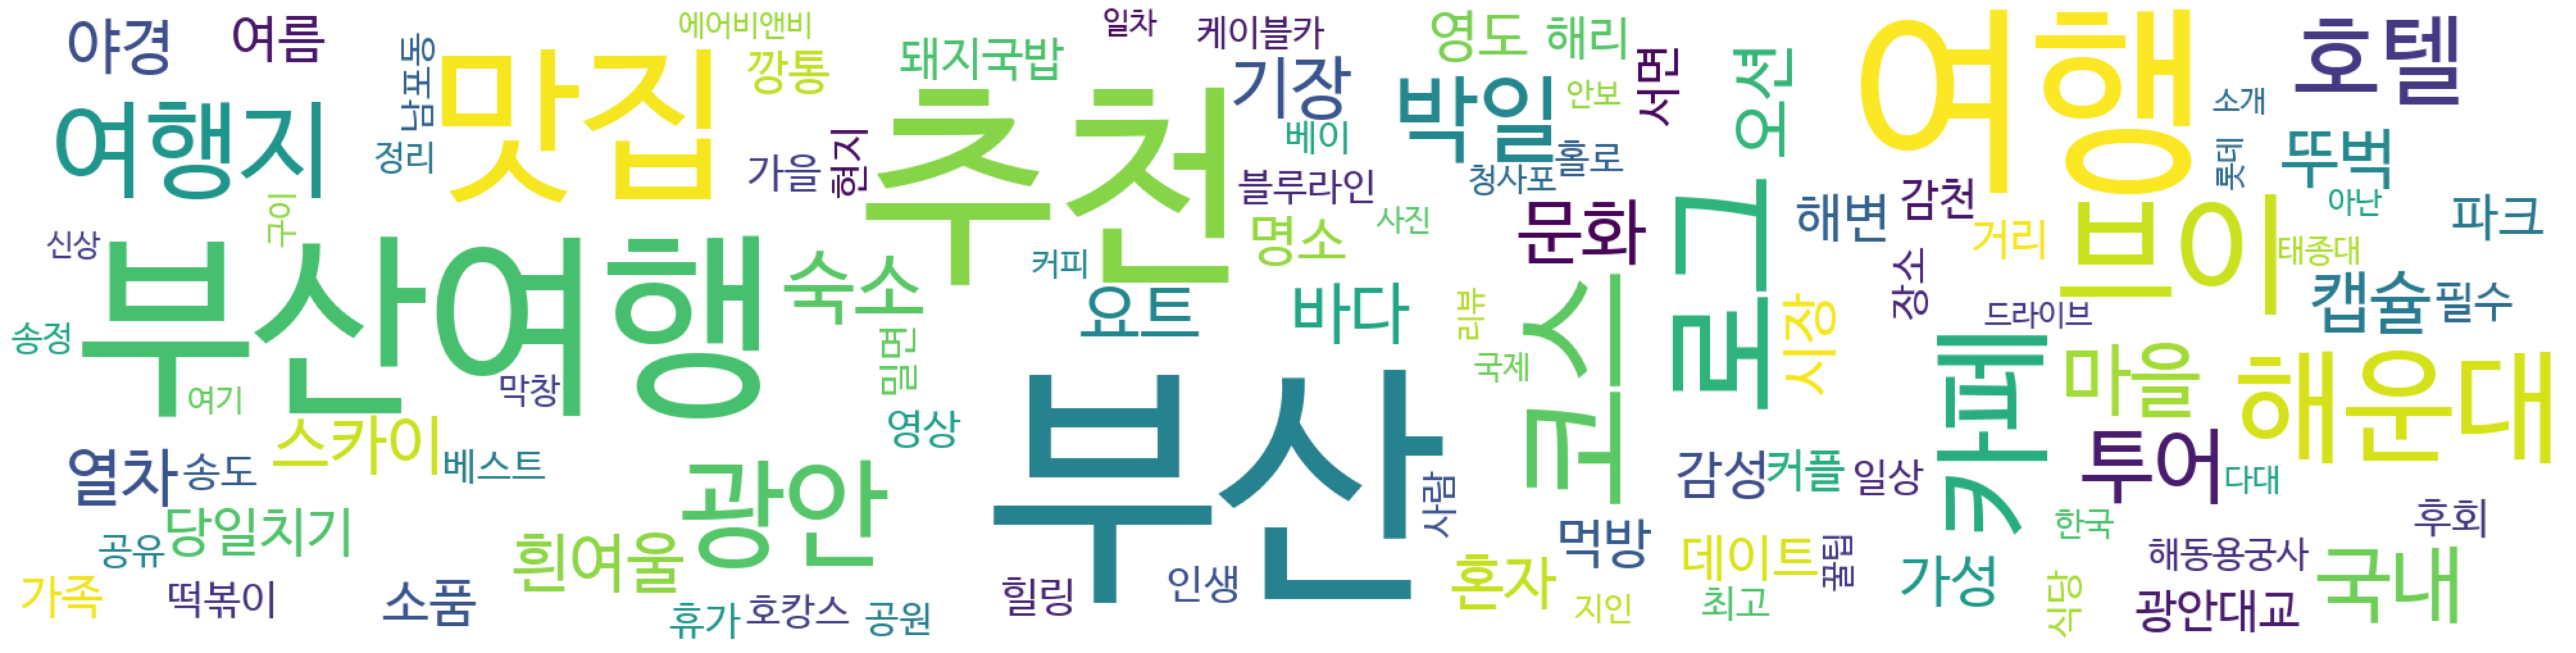

In [19]:
#wordcloud 만들기
wc = WordCloud(max_font_size=200,
	font_path = font_path,
	background_color="white",
    width=2000, height=500).generate_from_frequencies(dict(count))
    # font 경로 개별적으로 설정해야함

plt.figure(figsize = (40,40))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()